### Information about Dataset
#### Column Profiling:
#### MMMM-YY : Reporting Date (Monthly)
#### Driver_ID : Unique id for drivers
#### Age : Age of the driver
#### Gender : Gender of the driver – Male : 0, Female: 1
#### City : City Code of the driver
#### Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
#### Income : Monthly average Income of the driver
#### Date Of Joining : Joining date for the driver
#### LastWorkingDate : Last date of working for the driver
#### Joining Designation : Designation of the driver at the time of joining
#### Grade : Grade of the driver at the time of reporting
#### Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
#### Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'/Users/phoenix'

In [3]:
os.chdir('/Users/phoenix/Downloads')

In [4]:
ola = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
ola.shape

(19104, 14)

In [6]:
ola.drop("Unnamed: 0" ,axis = 1,inplace = True)

In [7]:
ola.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [8]:
ola.shape

(19104, 13)

In [9]:
ola.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [10]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [11]:
## Checking for missing values
ola.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
ola["Gender"].value_counts()

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64

In [13]:
## Converting date columns to date format

ola["MMM-YY"] = pd.to_datetime(ola["MMM-YY"])
ola["LastWorkingDate"] = pd.to_datetime(ola["LastWorkingDate"])
ola["Dateofjoining"] = pd.to_datetime(ola["Dateofjoining"])

In [14]:
ola.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [15]:
ola.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [16]:
ola["Driver_ID"].nunique()

2381

In [17]:
dict = {"Age" : "max",
        "Gender" : "first",
        "City" : "last",
        "Education_Level" : "last",
        "Income" : "last",
        "Dateofjoining" : "last",
        "LastWorkingDate" : "last",
        "Joining Designation" : "last",
        "Grade" : "last",
        "Total Business Value" : "sum",
        "Quarterly Rating" : "last"}

In [18]:
## aggregating based on Driver IDs and Reporting Date

ola_group = ola.groupby(["Driver_ID","MMM-YY"]).agg(dict).reset_index()
ola_group

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2788,2020-09-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2788,2020-10-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2788,2020-11-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


## Creating new data frame to store unique records

In [20]:
uber = pd.DataFrame()

In [21]:
uber["Driver_ID"] = ola_group["Driver_ID"].unique()

In [22]:
#Shrinking multiple driver entries to single entry.

uber["Age"] = list(ola.groupby("Driver_ID").agg({"Age" : "max"})["Age"])
uber["Gender"] = list(ola.groupby("Driver_ID").agg({"Gender" : "last"})["Gender"])
uber["City"] = list(ola.groupby("Driver_ID").agg({"City" : "last"})["City"])
uber["Education_Level"] = list(ola.groupby("Driver_ID").agg({"Education_Level" : "last"})["Education_Level"])
uber["Income"] = list(ola.groupby("Driver_ID").agg({"Income" : "last"})["Income"])
uber["Dateofjoining"] = list(ola.groupby("Driver_ID").agg({"Dateofjoining" : "last"})["Dateofjoining"])
uber["LastWorkingDate"] = list(ola.groupby("Driver_ID").agg({"LastWorkingDate" : "last"})["LastWorkingDate"])
uber["Joining Designation"] = list(ola.groupby("Driver_ID").agg({"Joining Designation" : "last"})["Joining Designation"])
uber['Grade'] = list(ola.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
uber['Total_Business_Value'] = list(ola.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
uber['Last_Quarterly_Rating'] = list(ola.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [23]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
2,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
3,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1
4,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2


In [24]:
uber.shape

(2381, 12)

## Feature Engineering

In [26]:
#Creating target variable - driver churned or not
# 1 - Churned
# 0 - Not Churned

def check(val):
    """Takes boolean value and returns 0 if True else 1"""
    if val == True:
        return 0
    else:
        return 1

In [27]:
uber["Target_churn"] = uber["LastWorkingDate"].isnull().apply(check)

In [28]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1
1,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
2,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1
3,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1
4,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0


In [29]:
qrf = ola.groupby("Driver_ID").agg({'Quarterly Rating' : 'first'}).reset_index()
qrl = ola.groupby("Driver_ID").agg({'Quarterly Rating' : 'last'}).reset_index()

In [30]:
# Creating column - quarterly rating increased or not.

def check_rating(val):
    """Takes boolean value and returns 1 if True else 0"""
    if val == True:
        return 1
    else:
        return 0

In [31]:
uber['quart_rating_inc'] = (qrl["Quarterly Rating"] > qrf["Quarterly Rating"]).apply(check_rating)

In [32]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,0
1,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
2,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1,0
3,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1,0
4,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0,1


In [33]:
target_var = pd.DataFrame(uber["Target_churn"].value_counts()).reset_index()
target_var

,Target_churn,count
0,1,1616
1,0,765


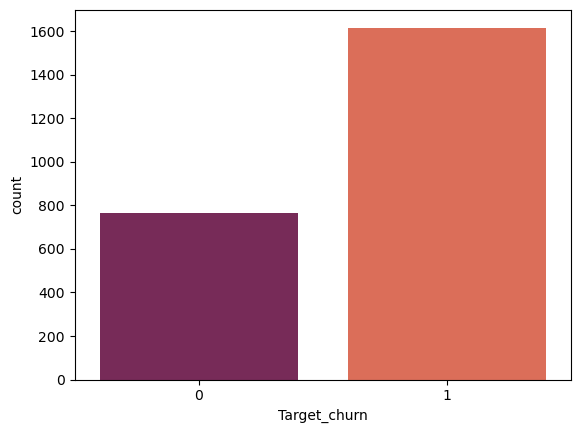

In [34]:
sns.barplot(target_var,x = 'Target_churn', y = 'count',palette = 'rocket')
plt.show()

### 1 - Churned
### 0 - Not Churned

In [35]:
mon_inc_f = ola.groupby(["Driver_ID"]).agg({'Income' : 'first'}).reset_index()
mon_inc_l = ola.groupby(["Driver_ID"]).agg({'Income' : 'last'}).reset_index()

In [36]:
#Creating new column - monthly income increased or not

def check_income(val):
    """Takes boolean value and returns 1 if True else 0"""
    if val == True:
        return 1
    else:
        return 0

In [37]:
uber['income_inc'] = (mon_inc_l["Income"] > mon_inc_f["Income"]).apply(check_income)

In [38]:
uber["income_inc"].value_counts()

income_inc
0    2338
1      43
Name: count, dtype: int64

In [39]:
## Dropping Unnecessary Columns

uber.drop(["Dateofjoining","LastWorkingDate"],axis = 1, inplace = True)

In [40]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0


In [41]:
uber.shape

(2381, 13)

In [42]:
##Statistical Summary

uber.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.678706,0.150357,0.018060
std,806.161628,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.467071,0.357496,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,0.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


In [43]:
uber_corr = uber.select_dtypes(include = ("float64","int64"))
uber_corr

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
0,1,28.0,0.0,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,1,78728,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,0,82815,2,3,21748820,4,0,1,0
2377,2785,34.0,1.0,0,12105,1,1,0,1,1,0,0
2378,2786,45.0,0.0,0,35370,2,2,2815090,1,1,0,0
2379,2787,28.0,1.0,2,69498,1,1,977830,1,1,0,0


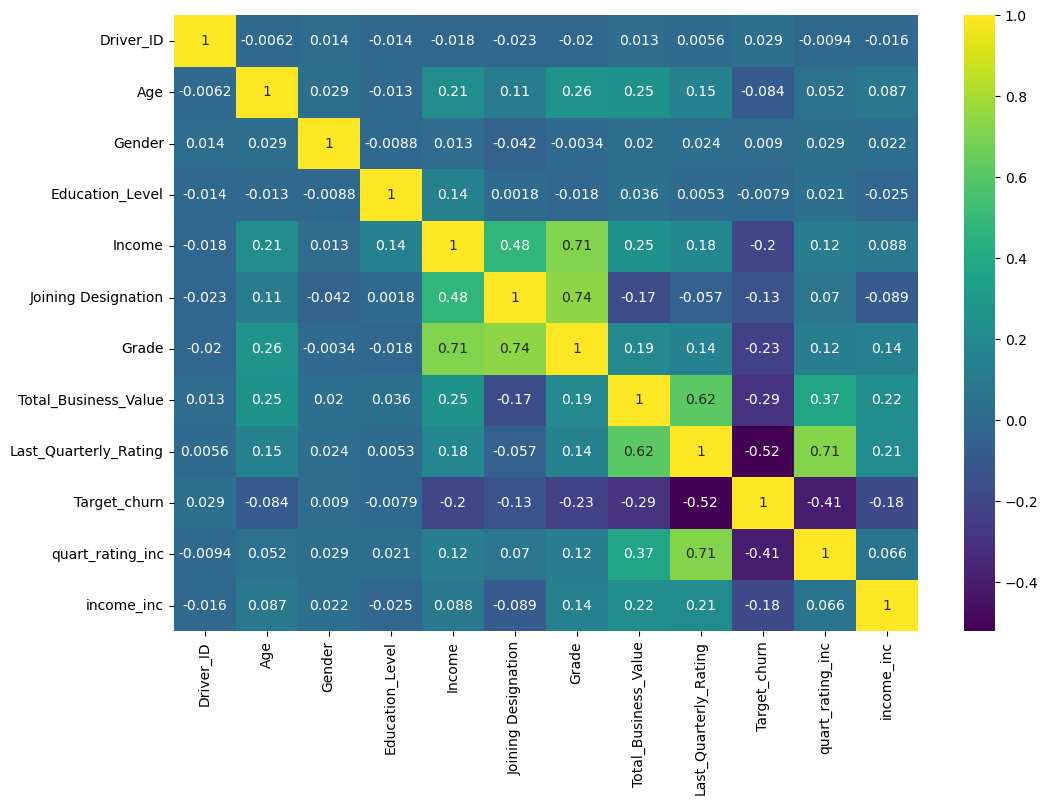

In [44]:
## Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(uber_corr.corr(method = 'spearman'), annot=True, cmap='viridis')
plt.show()

### Since none of the features exhibit strong correlations with each other i.e. they provide unique information, we can proceed with all of them as they are.

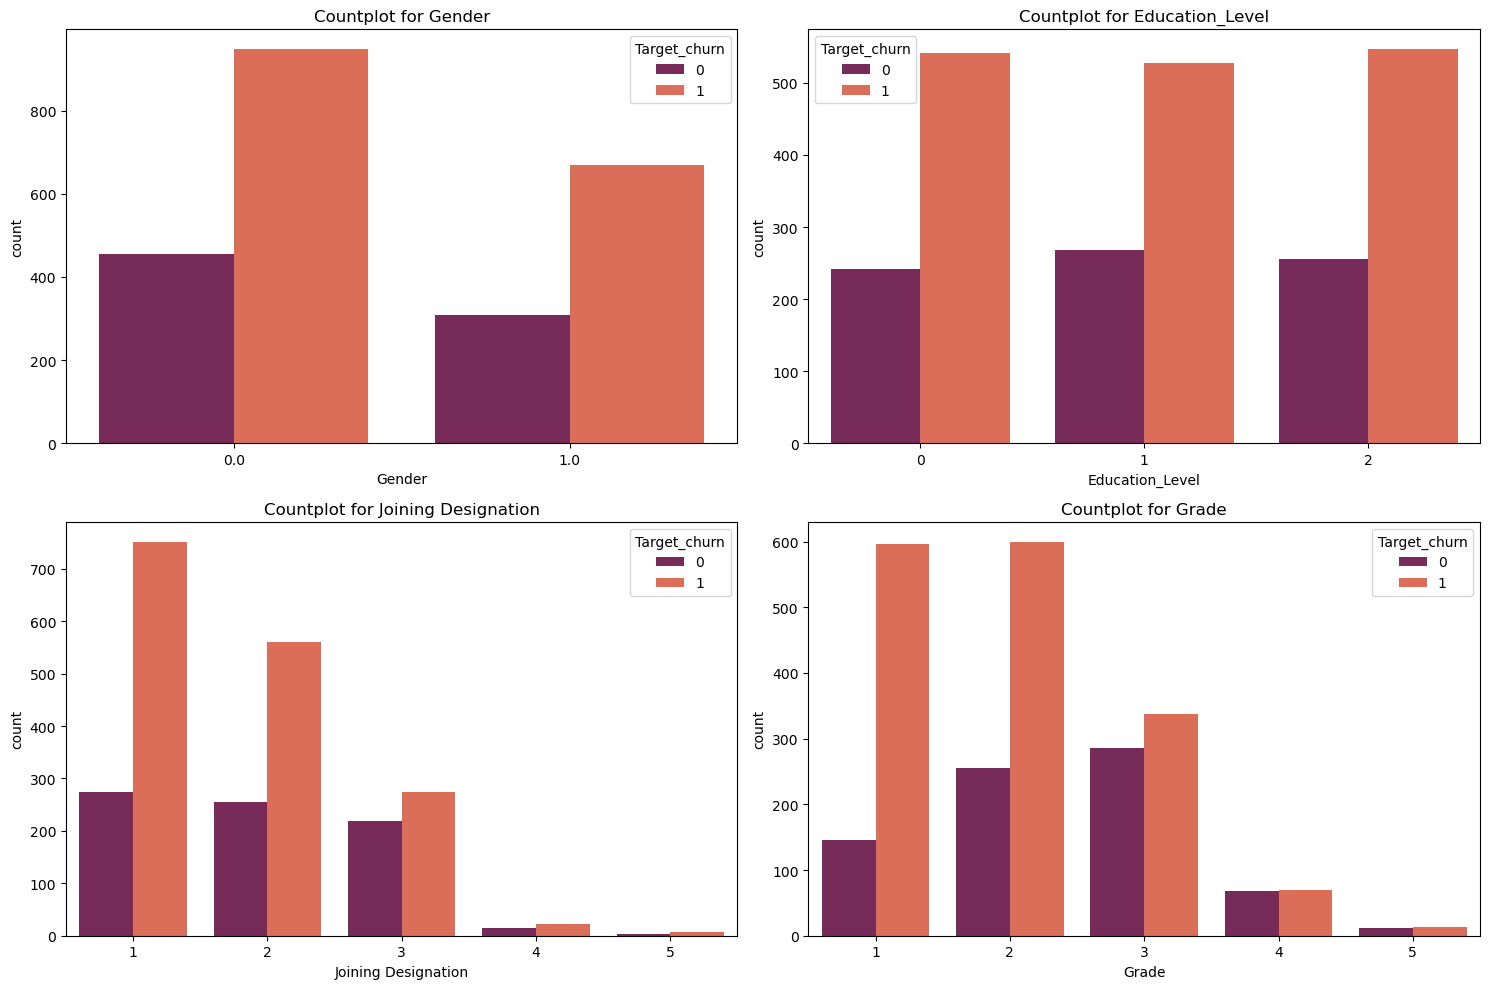

In [45]:
## Countplot of Categorical Features

lst = ["Gender", "Education_Level", "Joining Designation", "Grade"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(lst):
    sns.countplot(data=uber, x=col, hue="Target_churn", ax=axes[i],palette = 'rocket')
    axes[i].set_title(f"Countplot for {col}")
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

### Employees with a joining designation of 1 have a higher tendency to churn compared to other designations.
### Drivers in grades 1 and 2 are more likely to churn than those in other grades.
### Male employees have a higher churn rate compared to females.

In [46]:
# Binning

bins = [20,30,40,50,60]
labels = ["20-30","31-40","41-50","51-60"]
uber["Age_bin"] = pd.cut(uber["Age"],
                     labels = labels,
                     bins = bins)

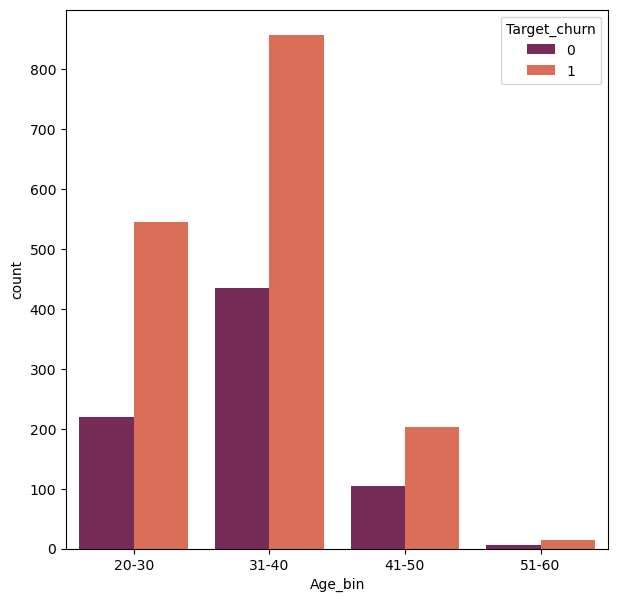

In [47]:
# Countplot of Age-bins

plt.figure(figsize = (7,7))
sns.countplot(uber,x = 'Age_bin',hue = "Target_churn",palette = 'rocket')
plt.show()

### Employee with age group between 31-40 are more likely to churn.

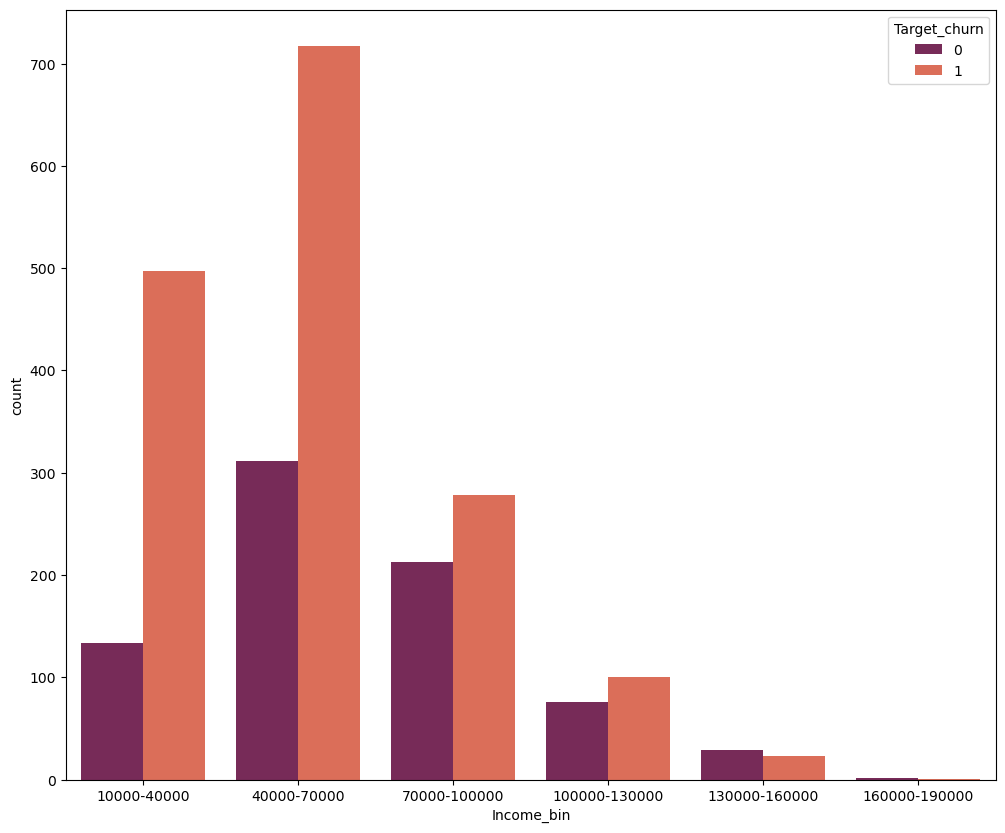

In [48]:
# Countplot of Income-bins

bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ]
labels = ["10000-40000","40000-70000","70000-100000","100000-130000","130000-160000","160000-190000"]
uber["Income_bin"] = pd.cut(uber["Income"],
                     labels = labels,
                     bins = bins)

plt.figure(figsize = (12,10))
sns.countplot(uber,x = 'Income_bin',hue = "Target_churn",palette = 'rocket')
plt.show()

### Employee with income level between 10k - 70k contribute to more than 50% of overall churn percentage.

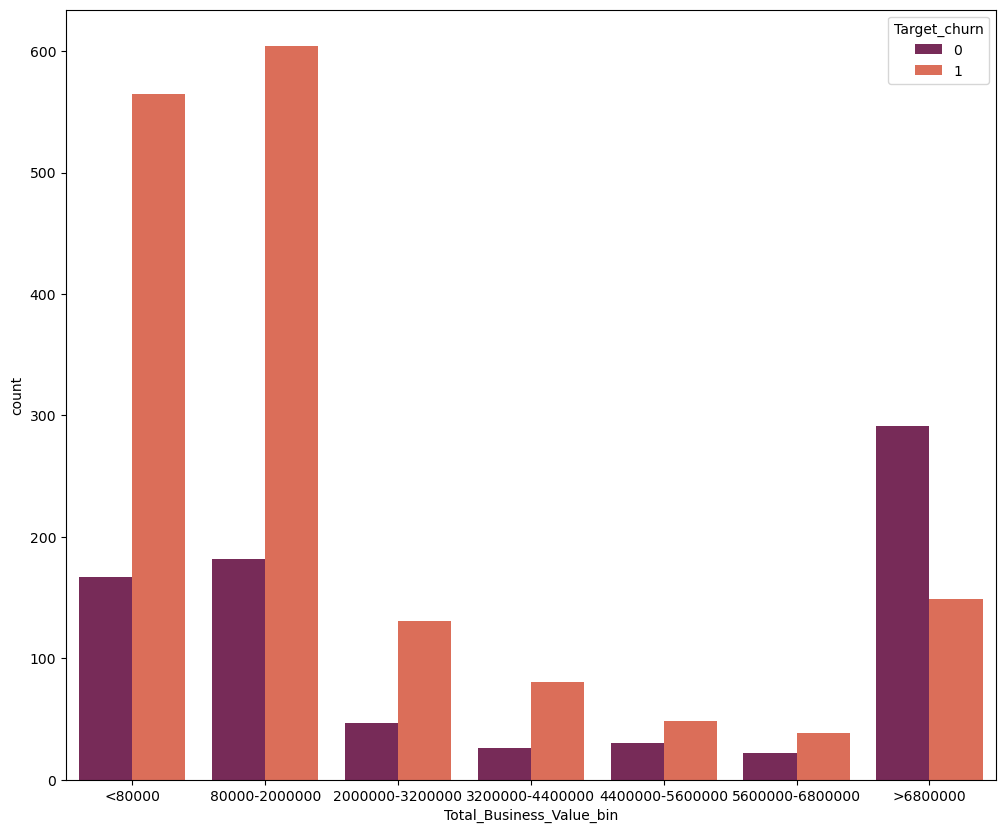

In [49]:
# Countplot of Total_Business_Value-bins

m1 = round(uber['Total_Business_Value'].min())
m2 = round(uber['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]
labels = ["<80000","80000-2000000","2000000-3200000","3200000-4400000","4400000-5600000","5600000-6800000",">6800000"]
uber["Total_Business_Value_bin"] = pd.cut(uber["Total_Business_Value"],
                     labels = labels,
                     bins = bins)

plt.figure(figsize = (12,10))
sns.countplot(uber,x = 'Total_Business_Value_bin',hue = "Target_churn",palette = 'rocket')
plt.show()

### Drivers generating total business value less than 2000000 have higher churning rate.

## Outlier detection

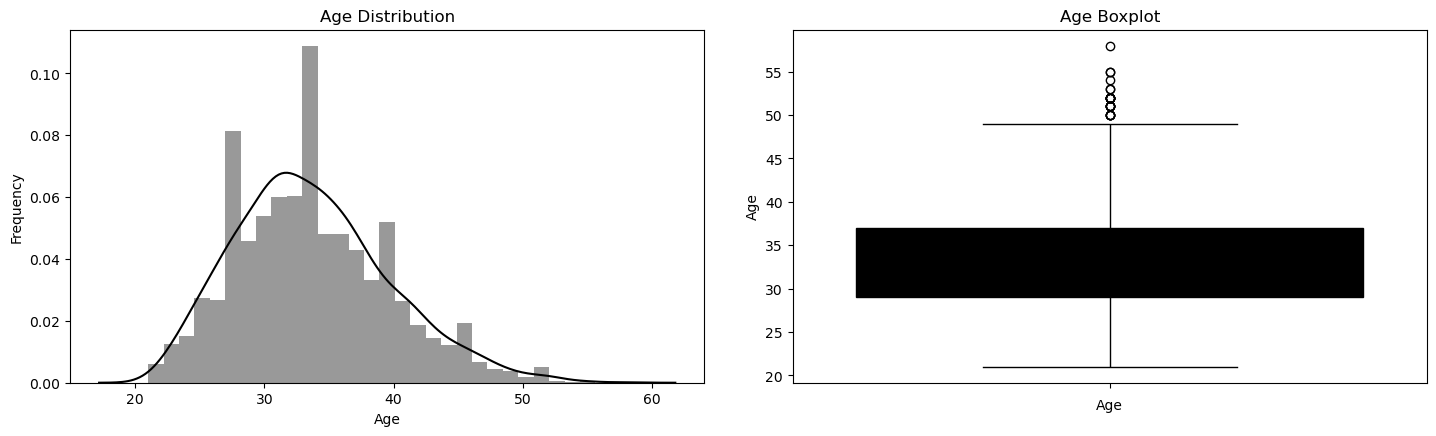

In [134]:
## Age

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(uber["Age"], kde=True, color="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=uber["Age"], color="black")
plt.title("Age Boxplot")
plt.xlabel("Age")

plt.tight_layout(pad=3)
plt.show()

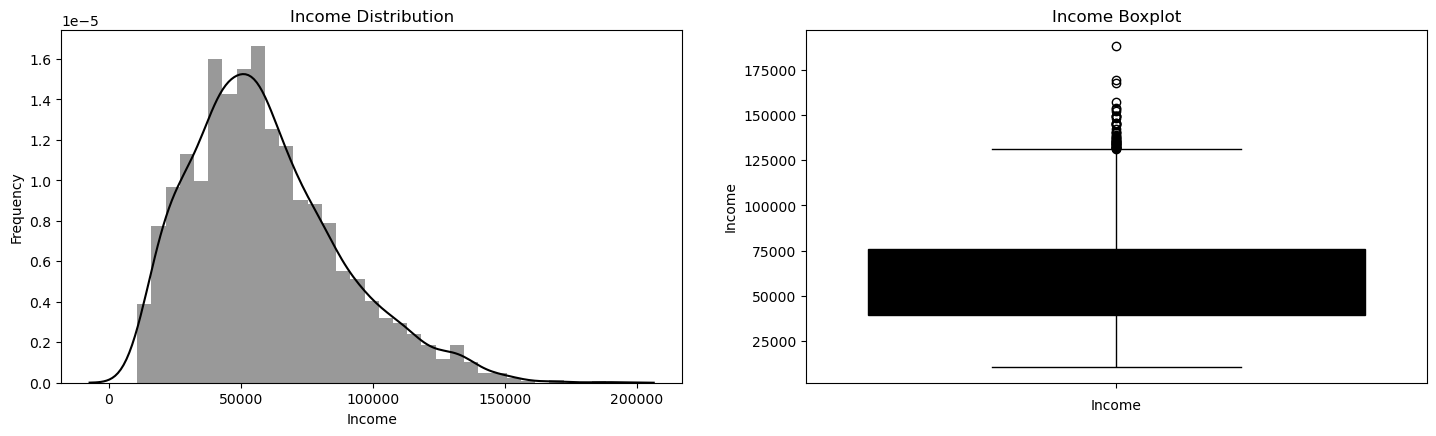

In [52]:
## Income

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(uber["Income"], kde=True, color="black")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=uber["Income"], color="black")
plt.title("Income Boxplot")
plt.xlabel("Income")

plt.tight_layout(pad=3)
plt.show()

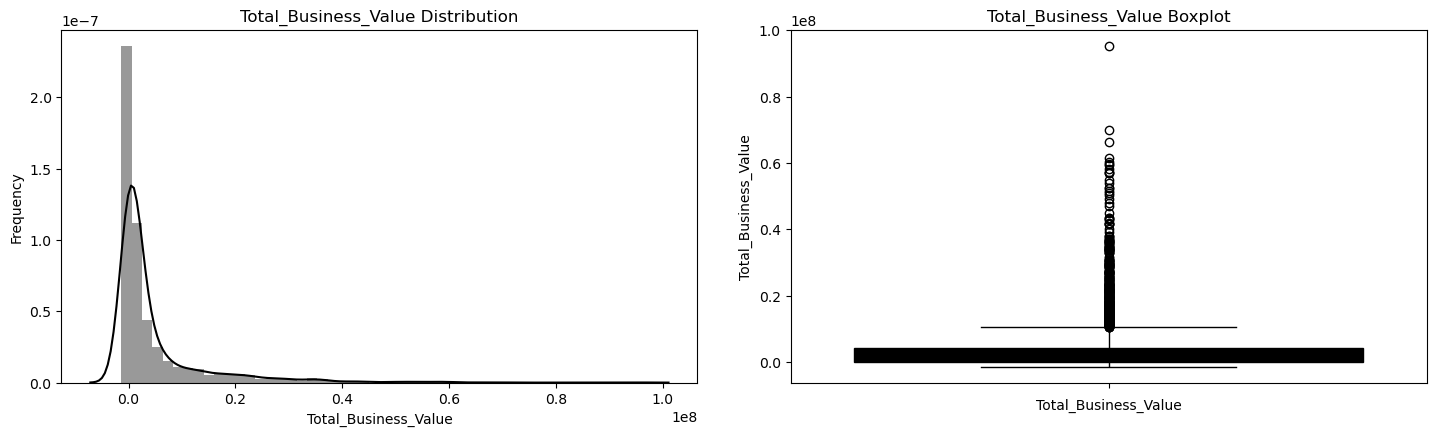

In [53]:
## Total_Business_Value

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(uber["Total_Business_Value"], kde=True, color="black")
plt.title("Total_Business_Value Distribution")
plt.xlabel("Total_Business_Value")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=uber["Total_Business_Value"], color="black")
plt.title("Total_Business_Value Boxplot")
plt.xlabel("Total_Business_Value")

plt.tight_layout(pad=3)
plt.show()

### Total Business Value is heavily right-skewed i.e. most values are low but a few very high values create a long right tail.

### Since the dataset is small,not removing outliers to avoid data loss.

In [54]:
uber.drop(["Age_bin","Income_bin","Total_Business_Value_bin"],axis = 1, inplace = True)

In [55]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0


In [56]:
## Creating a copy of df

uber_copy = uber.copy()
uber_copy.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0


### Target Encoding

In [57]:
uber['City'] = uber.groupby("City")["Target_churn"].transform('mean')

In [58]:
uber.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_churn,quart_rating_inc,income_inc
0,1,28.0,0.0,0.770270,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,0.684211,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,0.816901,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,0.706667,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,0.703125,1,78728,3,3,1265000,2,0,1,0


In [59]:
uber.drop("Driver_ID",axis = 1,inplace = True)

In [60]:
uber.isnull().sum()

Age                      0
Gender                   0
City                     0
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total_Business_Value     0
Last_Quarterly_Rating    0
Target_churn             0
quart_rating_inc         0
income_inc               0
dtype: int64

In [61]:
uber.shape

(2381, 12)

## Scaling and Preprocessing

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [64]:
X = uber.drop("Target_churn",axis = 1)
Y = uber["Target_churn"]

In [65]:
X.shape

(2381, 11)

In [66]:
Y.shape

(2381,)

In [67]:
Y.value_counts()

Target_churn
1    1616
0     765
Name: count, dtype: int64

In [68]:
### Oversampling

smt = SMOTE()
x_sm,y_sm = smt.fit_resample(X,Y)

In [69]:
y_sm.value_counts()

Target_churn
1    1616
0    1616
Name: count, dtype: int64

In [70]:
x_sm.shape

(3232, 11)

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 42)

In [72]:
x_train.shape

(2585, 11)

In [73]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
x_train_scaled

array([[ 1.74719074,  1.24409892,  0.0319416 , ..., -0.62869924,
        -0.44482401, -0.11715584],
       [-1.18442743,  1.24409892,  1.42039542, ..., -0.62869924,
        -0.44482401, -0.11715584],
       [-1.70177181, -0.8794053 ,  1.5890682 , ..., -0.62869924,
        -0.44482401, -0.11715584],
       ...,
       [-0.49463492, -0.8794053 ,  0.89323244, ..., -0.62869924,
        -0.44482401, -0.11715584],
       [-0.49463492, -0.8794053 , -0.29734096, ..., -0.62869924,
        -0.44482401, -0.11715584],
       [-0.06113571, -0.33388254,  0.05533064, ..., -0.62869924,
        -0.44482401, -0.11715584]])

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_recall_curve,roc_curve,roc_auc_score,auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

###  Type 1 Error (False Positive): Model incorrectly predicts that a driver will churn (class 1), but they actually do not churn (class 0).
###  Type 2 Error (False Negative): Model incorrectly predicts that a driver will not churn (class 0), but in reality, they do churn (class
#### Given that acquiring new drivers is more expensive than retaining existing ones, a Type 2 error (False Negative) is more dangerous for this business problem.
#### Reducing Type 2 errors (False Negatives) should be the priority. By improving this, we will ensure that we identify as many at-risk drivers as possible, thus minimizing losses and reducing the need to acquire new drivers.

## Model Building with Decision Tree

In [77]:
depths = [3, 5, 7, 11, 13, 15, 19, 20]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for depth in depths:
    uber_clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    cv_acc = cross_validate(uber_clf,x_train_scaled,y_train,cv= kfold,scoring='accuracy',return_train_score=True)

    print(f" k-fold for depth {depth} : - Accuracy_Mean: Train: {cv_acc['train_score'].mean() * 100:.2f}%,Validation: {cv_acc['test_score'].mean() * 100:.2f}%")

 k-fold for depth 3 : - Accuracy_Mean: Train: 74.65%,Validation: 74.08%
 k-fold for depth 5 : - Accuracy_Mean: Train: 77.07%,Validation: 75.59%
 k-fold for depth 7 : - Accuracy_Mean: Train: 81.91%,Validation: 75.59%
 k-fold for depth 11 : - Accuracy_Mean: Train: 91.67%,Validation: 75.63%
 k-fold for depth 13 : - Accuracy_Mean: Train: 95.49%,Validation: 75.86%
 k-fold for depth 15 : - Accuracy_Mean: Train: 97.97%,Validation: 76.32%
 k-fold for depth 19 : - Accuracy_Mean: Train: 99.67%,Validation: 76.29%
 k-fold for depth 20 : - Accuracy_Mean: Train: 99.78%,Validation: 76.25%


### We will use a maximum depth of 5 for building the decision tree model, as increasing the depth leads to higher overfitting (high variance & low bias)

In [78]:
## Building decision tree model with best hyperparameter

uber_best_tree = DecisionTreeClassifier(max_depth = 5, random_state=42)
uber_best_tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [79]:
y_predict = uber_best_tree.predict(x_train_scaled)

0.7539651837524178
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      1290
           1       0.69      0.93      0.79      1295

    accuracy                           0.75      2585
   macro avg       0.79      0.75      0.75      2585
weighted avg       0.79      0.75      0.75      2585



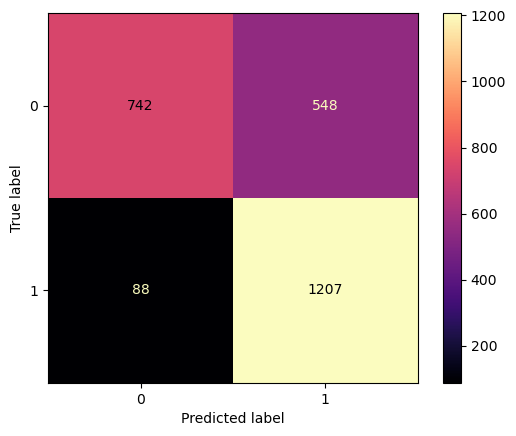

In [80]:
print(accuracy_score(y_train,y_predict))
conf_matrix = confusion_matrix(y_train,y_predict)
print(classification_report(y_train,y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

In [81]:
## Prediction on test data

y_pred = uber_best_tree.predict(x_test_scaled)

0.7341576506955177
              precision    recall  f1-score   support

           0       0.87      0.55      0.68       326
           1       0.67      0.92      0.77       321

    accuracy                           0.73       647
   macro avg       0.77      0.74      0.73       647
weighted avg       0.77      0.73      0.73       647



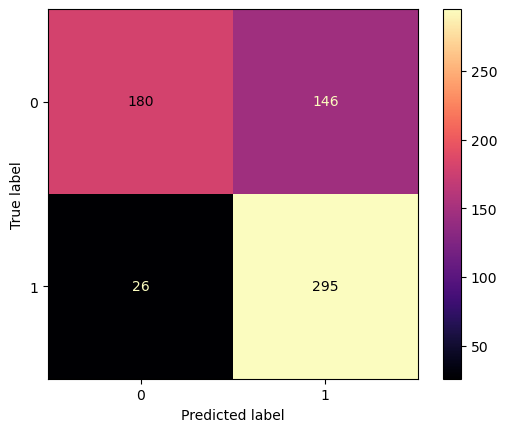

In [198]:
print(accuracy_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

#### Recall of 0.92 for class 1 means that, out of all the drivers who actually churned, the model has correctly identified 92% of them.
#### A precision of 0.67 for class 1 means that, out of all the drivers predicted to churn, 67% actually ended up churning.

### But the overall prediction for Decision tree model is not fairly good, so we'll try with other ensemble techniques.

**------------------------------------------------------------------------------------------------------------------------------------------**

## Bagging : Model Building with Random Forest

In [84]:
## Using Grid Search to find best hyperparameters

params = {
          'n_estimators' : [50,100,200,250],
          'max_depth': [10,15,20,25,30],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [1,2,4,6,8]
}
         
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid=params, cv=3, scoring='f1', n_jobs= -1)

grid_search_rf.fit(x_train_scaled,y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score achieved: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score achieved:  0.8314755845452607


In [85]:
# Fitting RFC with best hyperparameters

rfc_final = RandomForestClassifier(n_estimators = 100,max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, random_state=42)
rfc_final.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [86]:
y_predict_rf = rfc_final.predict(x_train_scaled)

0.9176015473887814
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1290
           1       0.87      0.98      0.92      1295

    accuracy                           0.92      2585
   macro avg       0.93      0.92      0.92      2585
weighted avg       0.93      0.92      0.92      2585



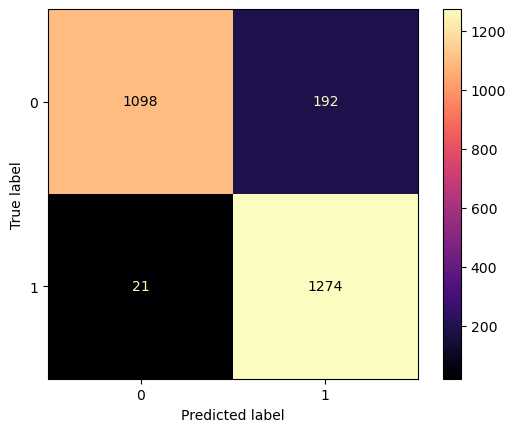

In [87]:
print(accuracy_score(y_train,y_predict_rf))
conf_matrix = confusion_matrix(y_train,y_predict_rf)
print(classification_report(y_train,y_predict_rf))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

In [88]:
## Prediction on test data

y_pred_rf = rfc_final.predict(x_test_scaled)

0.8083462132921174
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       326
           1       0.76      0.90      0.82       321

    accuracy                           0.81       647
   macro avg       0.82      0.81      0.81       647
weighted avg       0.82      0.81      0.81       647



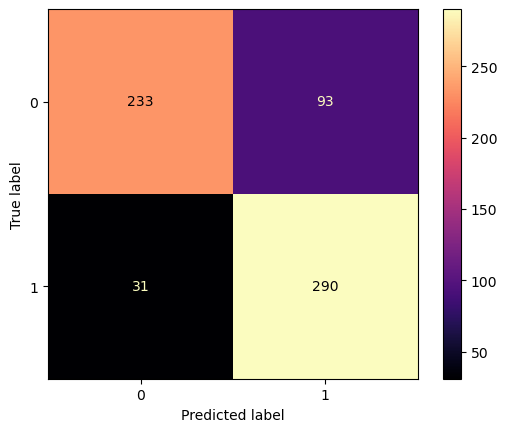

In [89]:
print(accuracy_score(y_test,y_pred_rf))
conf_matrix = confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')

#### We can see an overall improvement here as compared to decision tree model.Accuracy and F1-Score both have increased fairly for Random Forest Model

**------------------------------------------------------------------------------------------------------------------------------------------**

## Boosting : Model Building with GBDT

In [91]:
## Using Grid Search to find best hyperparameters

params = {
          'learning_rate' : [0.1, 0.05, 0.01, 0.005, 0.001],
          'n_estimators' : [100,200,300],
          'max_depth': [5,8],
          'min_samples_split': [2,4,6]
}
         
gbc = GradientBoostingClassifier(random_state=42)
grid_search_gbc = GridSearchCV(gbc, param_grid=params, cv=3, scoring='f1', n_jobs= -1)

grid_search_gbc.fit(x_train_scaled,y_train)

print("Best parameters found: ", grid_search_gbc.best_params_)
print("Best cross-validation score achieved: ", grid_search_gbc.best_score_)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score achieved:  0.8445110393548824


In [92]:
# Fitting RFC with best hyperparameters

gbc_final = GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 100,max_depth = 5, min_samples_split = 4, random_state=42)
gbc_final.fit(x_train_scaled,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [93]:
## Prediction on test data

y_pred_gbc = gbc_final.predict(x_train_scaled)

0.9384912959381044
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1290
           1       0.91      0.98      0.94      1295

    accuracy                           0.94      2585
   macro avg       0.94      0.94      0.94      2585
weighted avg       0.94      0.94      0.94      2585



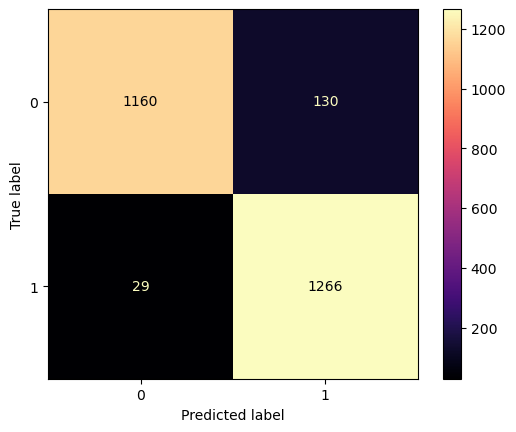

In [94]:
print(accuracy_score(y_train,y_pred_gbc))
conf_matrix = confusion_matrix(y_train,y_pred_gbc)
print(classification_report(y_train,y_pred_gbc))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

In [95]:
## Prediction on test data

y_predict_gbc = gbc_final.predict(x_test_scaled)

0.8222565687789799
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       326
           1       0.78      0.89      0.83       321

    accuracy                           0.82       647
   macro avg       0.83      0.82      0.82       647
weighted avg       0.83      0.82      0.82       647



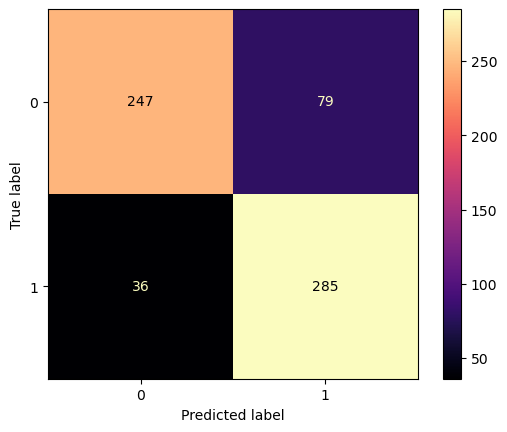

In [96]:
print(accuracy_score(y_test,y_predict_gbc))
conf_matrix = confusion_matrix(y_test,y_predict_gbc)
print(classification_report(y_test,y_predict_gbc))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

#### Here, We can see GBDT performs better than Decision tree and almost same as Random Forest giving an f1-score of 81 and 83% for both class respectively. 

**------------------------------------------------------------------------------------------------------------------------------------------**

## Model Building with XGBoost

In [98]:
# !pip install xgboost

In [99]:
params = {
          'learning_rate' : [0.1, 0.05, 0.01, 0.005, 0.001],
          'n_estimators' : [100,200,300],
          'max_depth': [5,8],
          'colsample_bytree' : [0.7,0.8,0.9],
          'colsample_bylevel' : [0.8,0.9],
          'colsample_bynode' : [0.7,0.8]
}

xgb = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid=params, cv=3, scoring='f1', n_jobs= -1)

grid_search_xgb.fit(x_train_scaled,y_train)

print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best cross-validation score achieved: ", grid_search_xgb.best_score_)

Best parameters found:  {'colsample_bylevel': 0.9, 'colsample_bynode': 0.7, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Best cross-validation score achieved:  0.8431393532550963


In [100]:
# Fitting XGBoost with best hyperparameters

xgb_final = XGBClassifier(learning_rate = 0.1,n_estimators = 100,max_depth = 5,colsample_bytree = 0.9,colsample_bylevel = 0.8,colsample_bynode = 0.8, random_state=42)
xgb_final.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.9,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [101]:
y_pred_xgb = xgb_final.predict(x_train_scaled)

0.8982591876208897
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1290
           1       0.85      0.96      0.90      1295

    accuracy                           0.90      2585
   macro avg       0.90      0.90      0.90      2585
weighted avg       0.90      0.90      0.90      2585



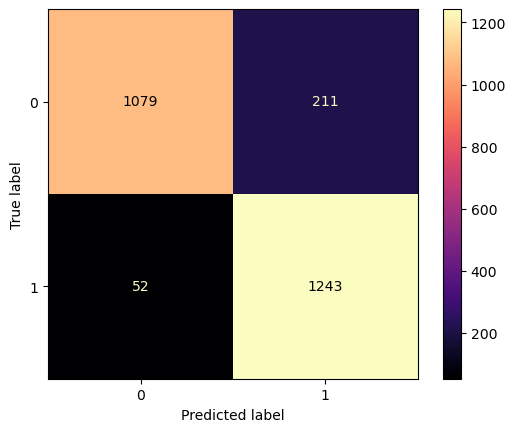

In [102]:
print(accuracy_score(y_train,y_pred_xgb))
conf_matrix = confusion_matrix(y_train,y_pred_xgb)
print(classification_report(y_train,y_pred_xgb))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

In [103]:
## Prediction on test data

y_predict_xgb = xgb_final.predict(x_test_scaled)

0.8006182380216383
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       326
           1       0.75      0.89      0.82       321

    accuracy                           0.80       647
   macro avg       0.81      0.80      0.80       647
weighted avg       0.81      0.80      0.80       647



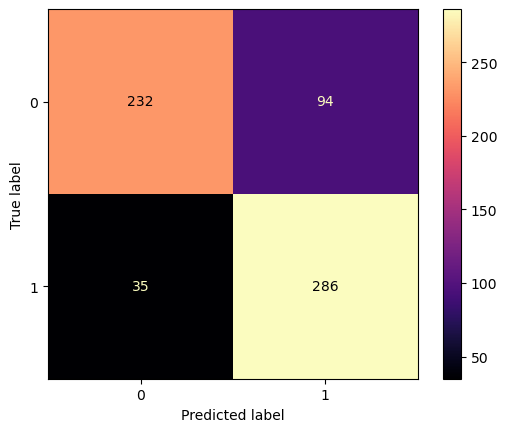

In [104]:
print(accuracy_score(y_test,y_predict_xgb))
conf_matrix = confusion_matrix(y_test,y_predict_xgb)
print(classification_report(y_test,y_predict_xgb))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

#### XGBoost is performing similar to Random Forest and XGBoost

**------------------------------------------------------------------------------------------------------------------------------------------**

## Model Building with LightGBM

In [106]:
# !pip install lightgbm

In [107]:
params = {
          'learning_rate' : [0.1, 0.05, 0.01, 0.005, 0.001],
          'n_estimators' : [100,200,300],
          'max_depth': [5,8],
          'feature_fraction' : [0.8,0.9,1.0],
          'verbose': [-1]
}

lgbm = LGBMClassifier(random_state=42)
grid_search_lgbm = GridSearchCV(lgbm, param_grid=params, cv=3, scoring='f1', n_jobs= -1)

grid_search_lgbm.fit(x_train_scaled,y_train)

print("Best parameters found: ", grid_search_lgbm.best_params_)
print("Best cross-validation score achieved: ", grid_search_lgbm.best_score_)

Best parameters found:  {'feature_fraction': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300, 'verbose': -1}
Best cross-validation score achieved:  0.8429688472654683


In [108]:
lgbm_final = LGBMClassifier(feature_fraction = 0.9,learning_rate = 0.1,max_depth = 5,n_estimators = 200,random_state=42)
lgbm_final.fit(x_train_scaled,y_train)

LGBMClassifier(feature_fraction=0.9, max_depth=5, n_estimators=200,
               random_state=42)

In [109]:
y_pred_lgbm = lgbm_final.predict(x_train_scaled)

0.9555125725338491
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1290
           1       0.93      0.99      0.96      1295

    accuracy                           0.96      2585
   macro avg       0.96      0.96      0.96      2585
weighted avg       0.96      0.96      0.96      2585



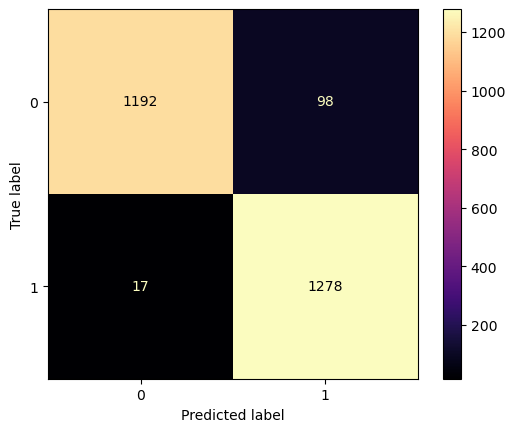

In [110]:
print(accuracy_score(y_train,y_pred_lgbm))
conf_matrix = confusion_matrix(y_train,y_pred_lgbm)
print(classification_report(y_train,y_pred_lgbm))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

In [111]:
## Prediction on test data

y_predict_lgbm = lgbm_final.predict(x_test_scaled)

0.8191653786707882
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       326
           1       0.78      0.88      0.83       321

    accuracy                           0.82       647
   macro avg       0.82      0.82      0.82       647
weighted avg       0.82      0.82      0.82       647



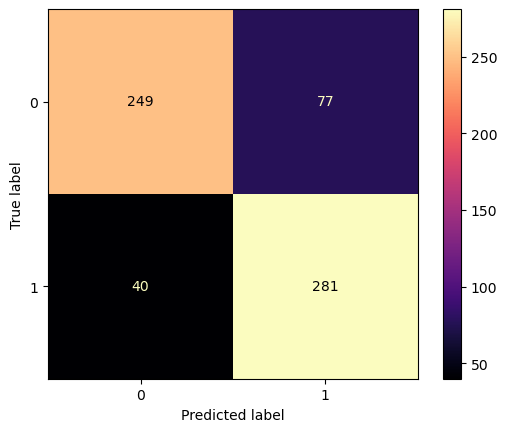

In [112]:
print(accuracy_score(y_test,y_predict_lgbm))
conf_matrix = confusion_matrix(y_test,y_predict_lgbm)
print(classification_report(y_test,y_predict_lgbm))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap= 'magma')
plt.show()

#### LightGBM has f1-score of 0.81 and 0.83 respectively for both class which is almost similar to other ensemble techniques.

**------------------------------------------------------------------------------------------------------------------------------------------**

## Comparing model performance using ROC and PR Curve

In [114]:
#Getting probabilities of each model.

prob_DT = uber_best_tree.predict_proba(x_test_scaled)
prob_RF = rfc_final.predict_proba(x_test_scaled)
prob_GBDT = gbc_final.predict_proba(x_test_scaled)
prob_xgboost = xgb_final.predict_proba(x_test_scaled)
prob_lgbm = lgbm_final.predict_proba(x_test_scaled)

In [115]:
#Extracting the probabilities of positive class.

probablities_DT = prob_DT[:,-1]
probablities_RF = prob_RF[:,-1]
probablities_GBDT = prob_GBDT[:,-1]
probablities_xgboost = prob_xgboost[:,-1]
probablities_lgbm = prob_lgbm[:,-1]

In [116]:
#Getting false positive and true positive rates for all models at different thresholds.

fpr_DT, tpr_DT, thr_DT = roc_curve(y_test,probablities_DT)
fpr_RF, tpr_RF, thr_RF = roc_curve(y_test,probablities_RF)
fpr_GBDT, tpr_GBDT, thr_GBDT = roc_curve(y_test,probablities_GBDT)
fpr_xgboost, tpr_xgboost, thr_xgboost = roc_curve(y_test,probablities_xgboost)
fpr_lgbm, tpr_lgbm, thr_lgbm = roc_curve(y_test,probablities_lgbm)

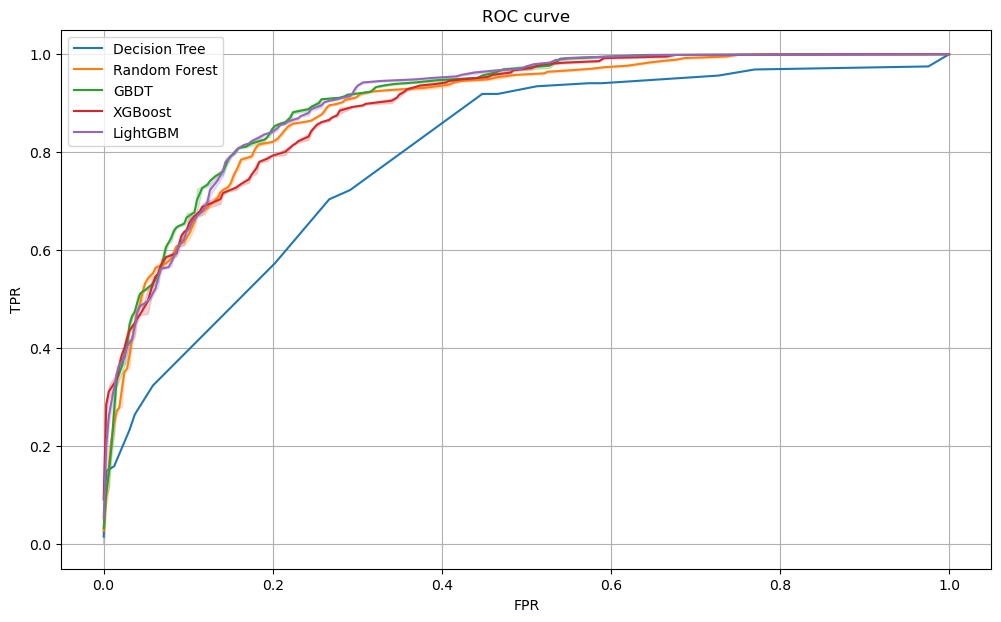

In [236]:
#Plot of TPR vs FPR.

plt.figure(figsize = (12,7))

sns.lineplot(x = fpr_DT,y = tpr_DT,label = 'Decision Tree')
sns.lineplot(x = fpr_RF, y = tpr_RF, label = 'Random Forest')
sns.lineplot(x = fpr_GBDT, y = tpr_GBDT,label = 'GBDT')
sns.lineplot(x = fpr_xgboost, y = tpr_xgboost,label = 'XGBoost')
sns.lineplot(x = fpr_lgbm, y = tpr_lgbm,label = 'LightGBM')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

#### We are comparing models using ROC Curve. A good model would have high True Positive Rate (TPR) and low False Psotive Rate (FPR)
#### The Graph which we can see above validates what we have evaluated so far with Decision tree performing worst and other models performing similar to each other

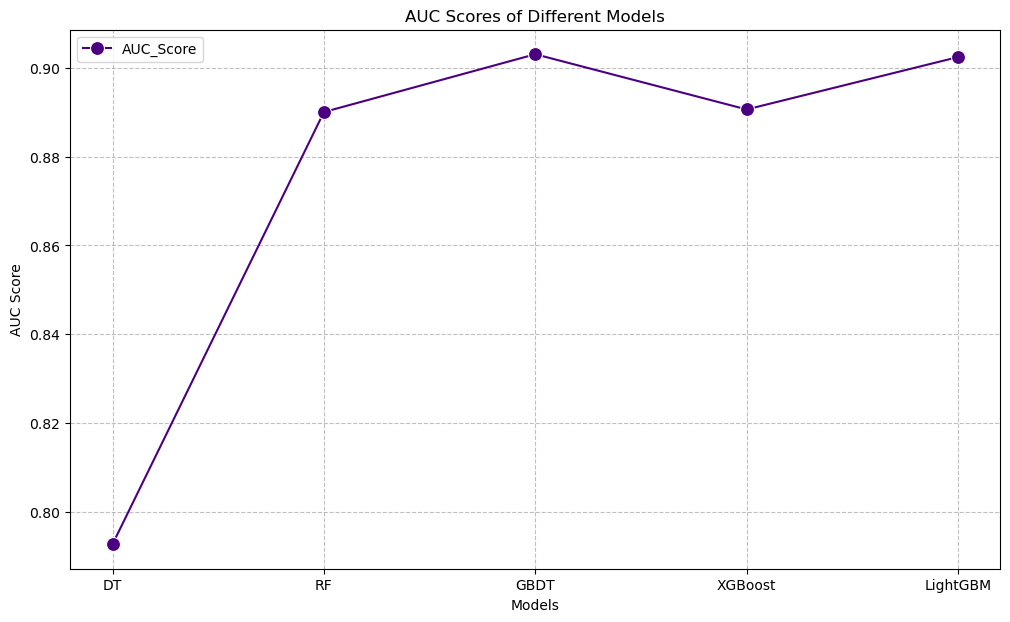

 Best_auc_score : 0.9030636622517821


In [219]:
#Area under curve values for ROC curve for all models.

auc_score = []

probabilities = [probablities_DT,probablities_RF,probablities_GBDT,probablities_xgboost,probablities_lgbm]

for prob in probabilities:
    auc_score.append(roc_auc_score(y_test,prob))

plt.figure(figsize = (12,7))
sns.lineplot(x = ['DT','RF','GBDT','XGBoost','LightGBM'], y =auc_score, marker='o', markersize=10, label='AUC_Score',color = 'indigo')

plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Different Models')
plt.grid(visible=True, linestyle='--', alpha=0.5,color = 'grey')
plt.show()
print(f" Best_auc_score : {max(auc_score)}")

#### LightGBM has performed best out of all the model with auc score of 0.903  an AUC of 0.9 shows the model is very effective at spotting churned drivers, and only a small chance of mixing them up with drivers who won't churn.

## PR Curve

In [126]:
#Getting precision and recall values of all models at different thresholds.

precision_DT, recall_DT, thr_DT = precision_recall_curve(y_test,probablities_DT)
precision_RF, recall_RF, thr_RF = precision_recall_curve(y_test,probablities_RF)
precision_GBDT, recall_GBDT, thr_GBDT = precision_recall_curve(y_test,probablities_GBDT)
precision_XGBoost, recall_XGBoost, thr_XGBoost = precision_recall_curve(y_test,probablities_xgboost)
precision_lgbm, recall_lgbm, thr_lgbm = precision_recall_curve(y_test,probablities_lgbm)

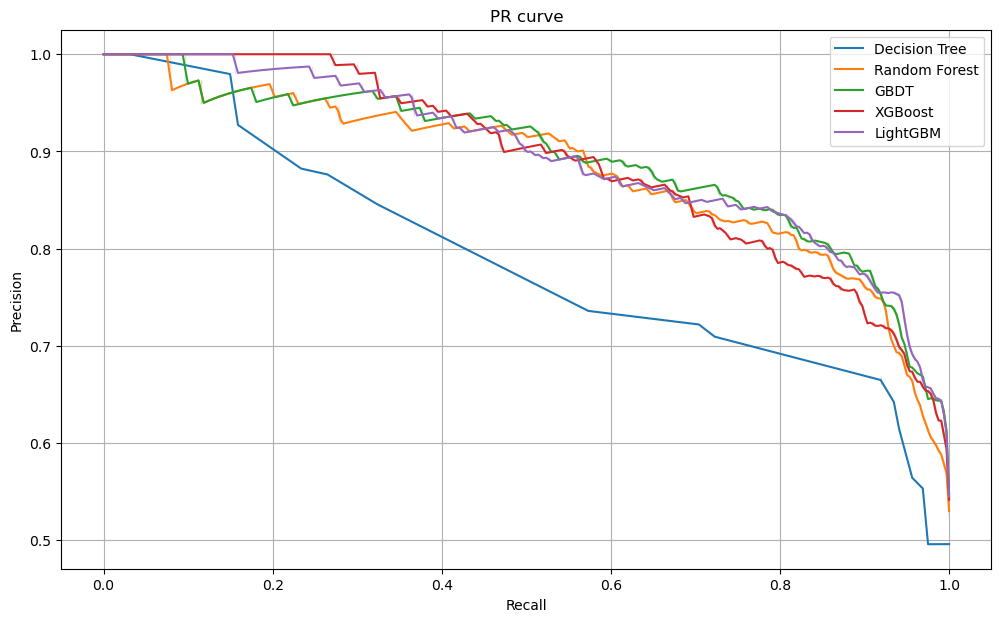

In [128]:
#Plot of Precision vs Recall.

plt.figure(figsize = (12,7))

sns.lineplot(y = precision_DT,x = recall_DT,label = 'Decision Tree')
sns.lineplot(y = precision_RF, x = recall_RF, label = 'Random Forest')
sns.lineplot(y = precision_GBDT, x = recall_GBDT,label = 'GBDT')
sns.lineplot(y = precision_XGBoost, x = recall_XGBoost,label = 'XGBoost')
sns.lineplot(y = precision_lgbm, x = recall_lgbm,label = 'LightGBM')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

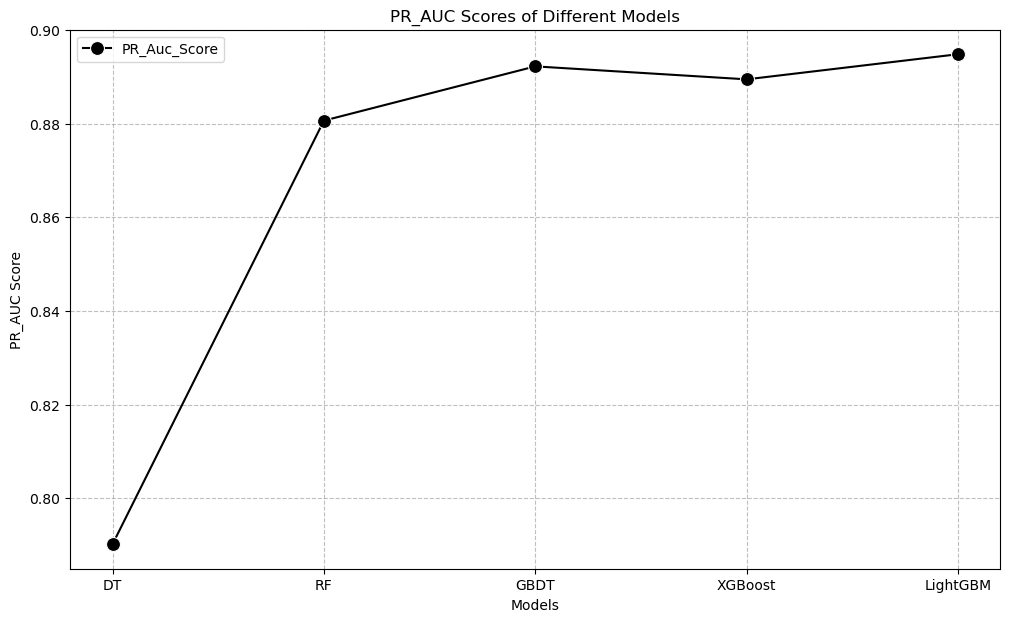

 Best_auc_pr_score : 0.8948574957178101


In [224]:
#Area under curve values for precision and recall curve.

pr_auc = []

p = [precision_DT,precision_RF,precision_GBDT,precision_XGBoost,precision_lgbm]
r = [recall_DT,recall_RF,recall_GBDT,recall_XGBoost,recall_lgbm]

for r,p in zip(r,p):
    pr_auc.append(auc(r,p))

plt.figure(figsize = (12,7))
sns.lineplot(x = ['DT','RF','GBDT','XGBoost','LightGBM'], y = pr_auc, marker='o', markersize=10, label='PR_Auc_Score',color = 'black')

plt.xlabel('Models')
plt.ylabel('PR_AUC Score')
plt.title('PR_AUC Scores of Different Models')
plt.grid(visible=True, linestyle='--', alpha=0.5,color = 'grey')
plt.show()
print(f" Best_auc_pr_score : {max(pr_auc)}")

#### Again we can see that LightGBM performs better than rest of the model with an AUC-PR Score of almost 0.9.It means that model is effectively identifying the positive class and maintaining a high precision and recall across various decision thresholds.

## Feature Importance from best performing Model (LightGBM)

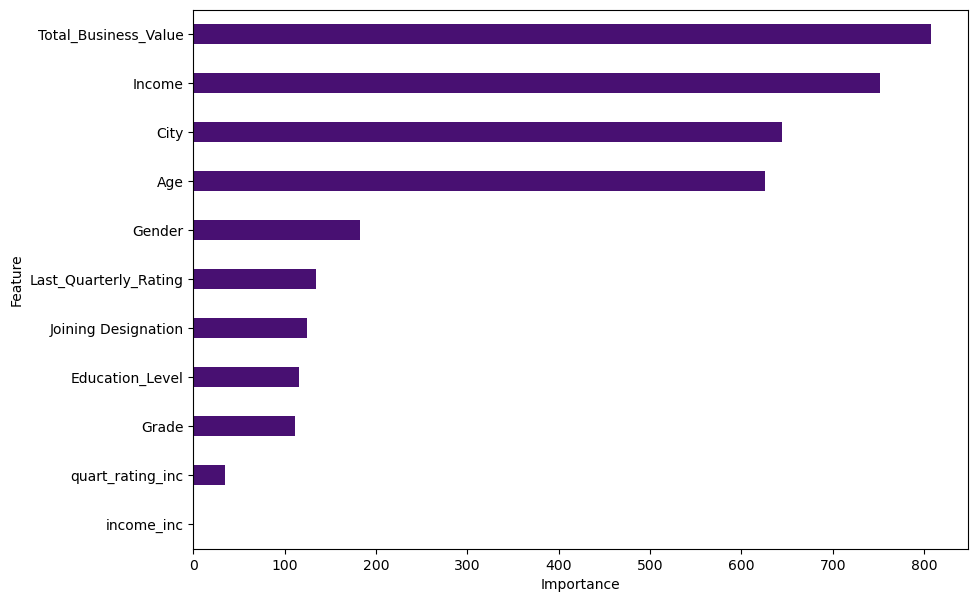

In [171]:
importances = lgbm_final.feature_importances_
feature_names = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# feature_importance_df
plt.figure(figsize = (10,7))
sns.barplot(feature_importance_df,y = 'Feature', x = 'Importance' ,color = 'indigo',width = 0.4)
plt.show()

#### Total_Business_Value comes out to be the most important feature for LightGBM in terms of split importance.